In [1]:
from picamera2 import Picamera2
from libcamera import Transform



from picamera2 import Picamera2

from ultralytics import YOLO
from libcamera import Transform
from depthest import init, estimate
from matplotlib import pyplot as plt

[185:48:39.512628586] [1070955]  INFO Camera camera_manager.cpp:325 libcamera v0.3.2+99-1230f78d
[185:48:39.570300580] [1071638]  WARN RPiSdn sdn.cpp:40 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[185:48:39.572980282] [1071638]  INFO RPI vc4.cpp:447 Registered camera /base/soc/i2c0mux/i2c@1/imx708@1a to Unicam device /dev/media2 and ISP device /dev/media0
[185:48:39.573051688] [1071638]  INFO RPI pipeline_base.cpp:1120 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[185:48:39.586823488] [1070955]  INFO Camera camera.cpp:1197 configuring streams: (0) 640x480-BGR888 (1) 1536x864-SGRBG10_CSI2P
[185:48:39.587614019] [1071638]  INFO RPI vc4.cpp:622 Sensor: /base/soc/i2c0mux/i2c@1/imx708@1a - Selected sensor format: 1536x864-SGRBG10_1X10 - Selected unicam format: 1536x864-pgAA


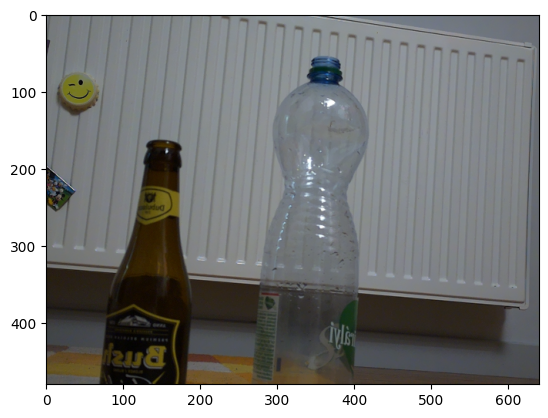

In [12]:
frame = None
# Initialize the Picamera2
with Picamera2() as picam2:
  # picam2.preview_configuration.main.size = (1280, 720)
  # picam2.preview_configuration.main.size = (640, 310)
  picam2.preview_configuration.main.format = "BGR888"
  picam2.preview_configuration.align()
  picam2.preview_configuration.transform=Transform(vflip=1)
  picam2.start()  
  # Capture the image and save it to the 'array' variable
  frame = picam2.capture_array("main") 

  # Stop the camera to free up resources
  picam2.stop() 
  picam2.stop_encoder()
  del picam2


# display image
plt.imshow(frame)

In [13]:
segmentModel = YOLO("yolo11n-seg.pt")  
# segment is trained on this: https://docs.ultralytics.com/datasets/segment/coco8-seg/#dataset-yaml
results = segmentModel.predict(source=frame, classes=39)



0: 480x640 2 bottles, 1575.7ms
Speed: 8.9ms preprocess, 1575.7ms inference, 14.2ms postprocess per image at shape (1, 3, 480, 640)


In [16]:


bottleMask = None

# Process results lists
for result in results:
  print("Running")
  
  print(result.masks.shape[0])
  if (result.masks.shape[0] > 1):
    print("Error! More than one bottle detected. Using the first one.")
    print("Error! More than one bottle detected. Using the first one.")
    print("Error! More than one bottle detected. Using the first one.")

    bottleMask = result.masks[0]  # Masks object for segmentation masks outputs

  


  
# select correct mask

# plt.imshow(masks)
# plt.show()

Running
2
Error! More than one bottle detected. Using the first one.
Error! More than one bottle detected. Using the first one.
Error! More than one bottle detected. Using the first one.
